In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt
!python -m spacy download es_core_news_sm
import spacy
from collections import Counter
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 1.5 MB/s eta 0:00:0000:0100:01m

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [3]:
nlp = spacy.load("es_core_news_sm")

# Definir una función para lematizar un texto
def lemmatize_text(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return lemmas

In [37]:

DATASET_SIN_IRONIA = '../../Resultados/Beto_tagged.csv'
DATASET_CON_IRONIA = '../../Resultados/Sentiment_tagged_ironia.csv'

data = pd.read_csv(DATASET_SIN_IRONIA, sep=';')
data.rename(columns={
    'text': 'Texto',
    'city': 'Ciudad',
    'newspaper': 'Periódico',
    'year': 'Año',
    'predictions_written': 'Sentimiento'
}, inplace=True)

data = data[data['Año']<2000]

data.head()

,Unnamed: 0.11,Unnamed: 0.10,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,...,Periódico,Ciudad,Texto,Sentimiento,predictions,negative_probs,neutral_probs,positive_probs,ironic_probs,Texto_Lematizado
0,0,0,0,0,0,0,0,0,0,0,...,Los loros,Popayán,publicacion semanal ignoramos si sus restos f...,NEUTRO,1.0,9.996460,55.532199,33.521801,0.949539,"['publicacion', 'semanal', 'ignorar', 'resto',..."
1,1,1,1,1,1,1,1,1,1,1,...,Los loros,Popayán,se presente en su oficina el que monto en la g...,NEUTRO,1.0,17.339712,63.219225,18.328328,1.112728,"['presentar', 'oficina', 'monto', 'gallina', '..."
2,2,2,2,2,2,2,2,2,2,2,...,Los loros,Popayán,"de baron de las tenazas, a don agustin castill...",POSITIVO,2.0,7.059140,42.583779,49.531049,0.826027,"['bar', 'tenaza', 'don', 'agustin', 'castillo'..."
3,3,3,3,3,3,3,3,3,3,3,...,Los loros,Popayán,"al articulo presente, en una oracion ferviente...",POSITIVO,2.0,6.416973,21.443181,71.021354,1.118488,"['articulo', 'presente', 'oracion', 'ferviente..."
4,4,4,4,4,4,4,4,4,4,4,...,Los loros,Popayán,quien es el que desde aca tantas noticias envi...,NEUTRO,1.0,11.500288,60.579348,27.018249,0.902115,"['aca', 'tanto', 'noticia', 'envia', 'adivinar..."


In [5]:
data.to_csv('../../Resultados/Beto_tagged.csv', sep=';')

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

def graficar_porcentaje_sentimientos(
        df,
        ciudad=None,
        periodico=None,
        min_year=None,
        max_year=None,
        titulo='Porcentaje de textos con por sentimiento vs año',
        sentiments=['POSITIVO', 'NEGATIVO', 'NEUTRO', 'IRONÍA']
    ):
    # Filtrar el DataFrame según los parámetros recibidos
    df_filtrado = df.copy()
    if ciudad:
        df_filtrado = df_filtrado[df_filtrado['Ciudad'] == ciudad]
        titulo += f' en {ciudad}'
    if periodico:
        df_filtrado = df_filtrado[df_filtrado['Periódico'] == periodico]
        titulo += f' publicado por {periodico}'
    if min_year:
        df_filtrado = df_filtrado[df_filtrado['Año'] >= min_year]
        titulo += f' a partir del año {min_year}'
    if max_year:
        df_filtrado = df_filtrado[df_filtrado['Año'] <= max_year]
        titulo += f' hasta el año {max_year}'

    # Agrupar los datos por año y sentimiento, y calcular el tamaño del grupo
    porcentaje_por_año = df_filtrado.groupby(['Año', 'Sentimiento']).size().unstack(fill_value=0).reset_index()

    # Asegurarse de que todas las columnas de sentimientos existen en el DataFrame
    for sentiment in sentiments:
        if sentiment not in porcentaje_por_año:
            porcentaje_por_año[sentiment] = 0

    # Calcular el total de textos por año
    porcentaje_por_año['Total'] = porcentaje_por_año[sentiments].sum(axis=1)

    # Obtener los años únicos
    anios = porcentaje_por_año['Año']
    
    # Iterar sobre los sentimientos para calcular y graficar el porcentaje
    for sentiment in sentiments:
        porcentaje_por_año[f'Porcentaje{sentiment}'] = porcentaje_por_año[sentiment] / porcentaje_por_año['Total'] * 100
        to_graph = porcentaje_por_año[f'Porcentaje{sentiment}']
        plt.plot(anios, to_graph, 'o-', label=sentiment)

    # Añadir leyenda y etiquetas
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Año')
    plt.ylabel('porcentaje')
    plt.title(titulo)

    # Ajustar visibilidad de los bordes
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Ajustar el rango del eje y y rotar las etiquetas del eje x
    plt.ylim(0)
    plt.xticks(anios, rotation=45)

    # Mostrar el gráfico
    plt.show()


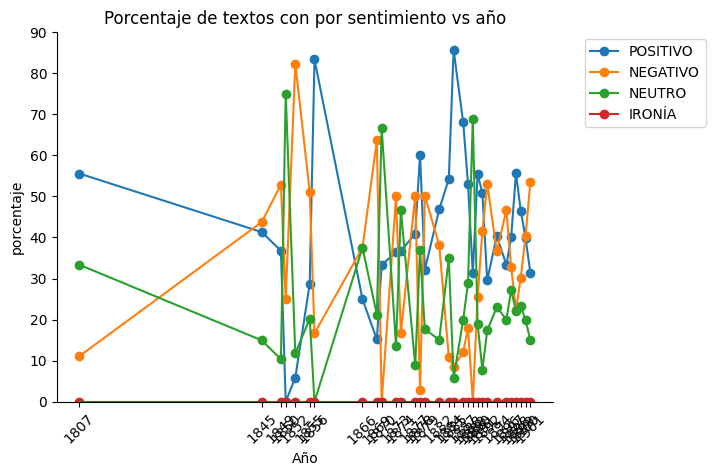

In [35]:
# Graficar toda la información
graficar_porcentaje_sentimientos(data)


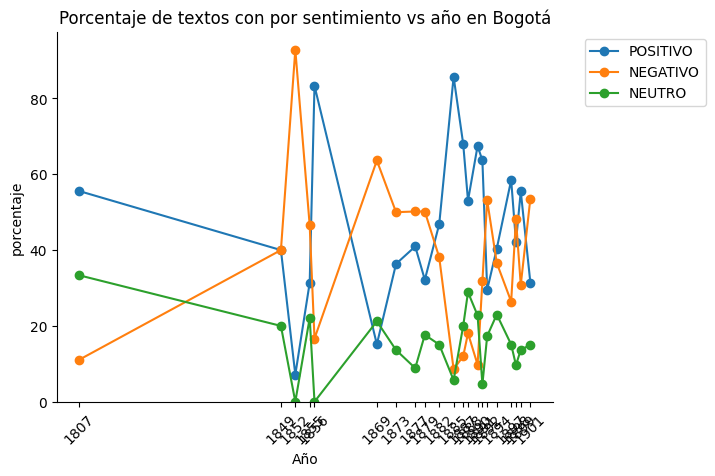

In [8]:
# Graficar solo para la ciudad de Bogotá
graficar_porcentaje_sentimientos(data, ciudad='Bogotá')

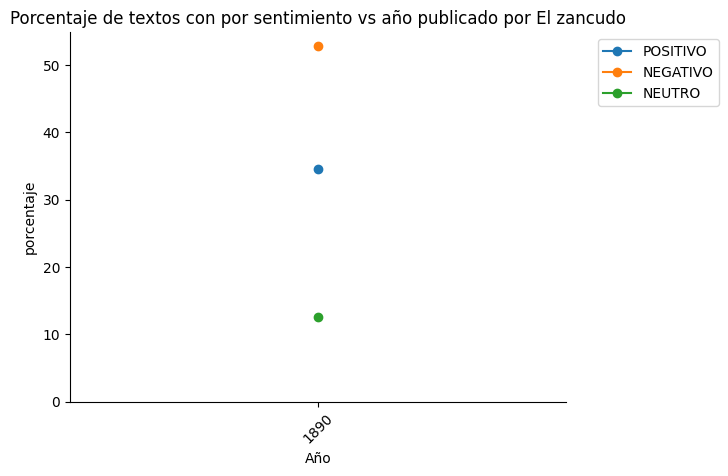

In [9]:
# Graficar solo para el periódico El Tiempo
graficar_porcentaje_sentimientos(data, periodico='El zancudo')

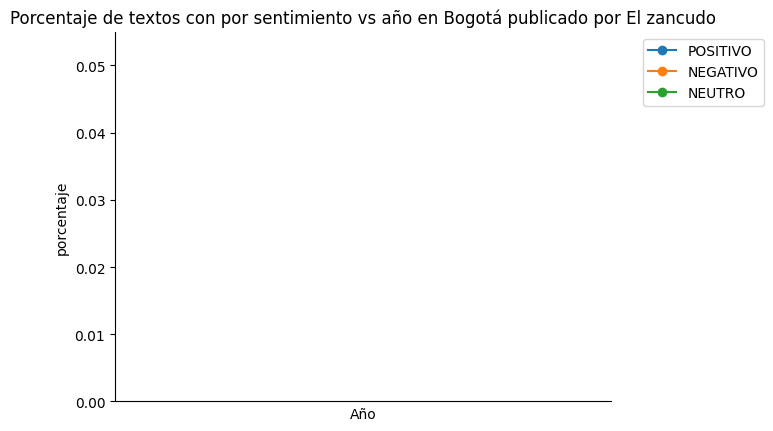

In [29]:
# Graficar solo para la ciudad de Bogotá y el periódico El Tiempo
graficar_porcentaje_sentimientos(data, ciudad='Bogotá', periodico='El zancudo')

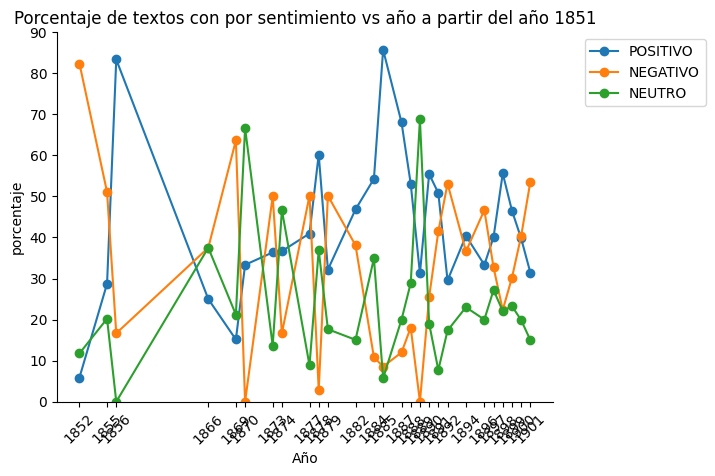

In [30]:
# Graficar solo para la ciudad de Bogotá y el periódico El Tiempo
graficar_porcentaje_sentimientos(data, min_year = 1851)

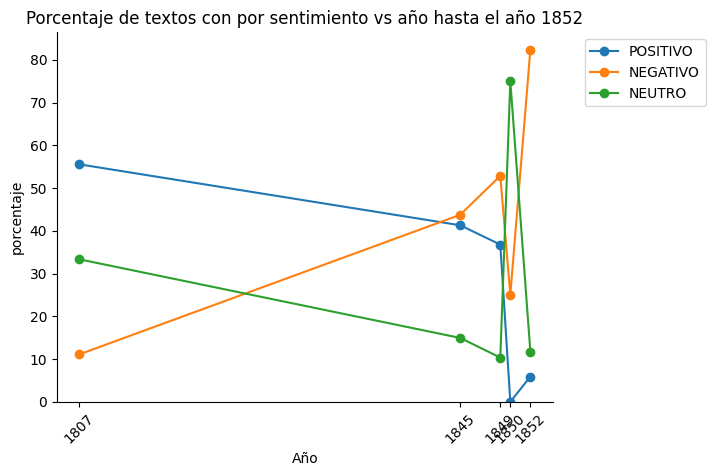

In [31]:
# Graficar solo para la ciudad de Bogotá y el periódico El Tiempo
graficar_porcentaje_sentimientos(data, max_year = 1852)

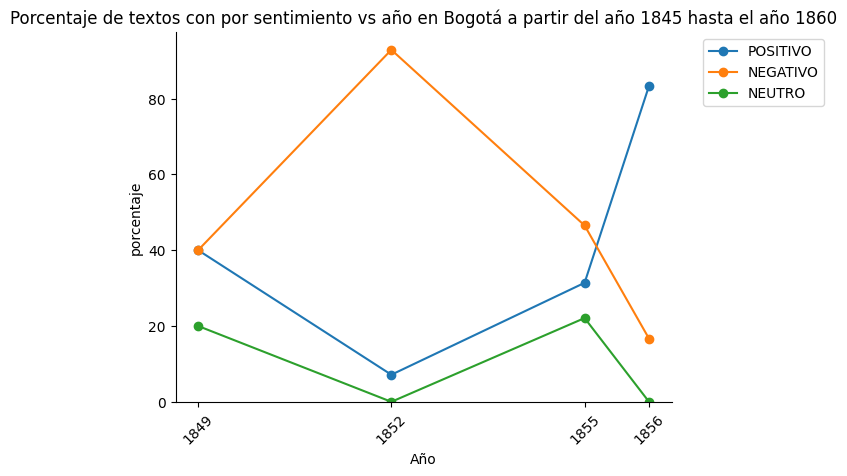

In [32]:
# Graficar solo para la ciudad de Bogotá y el periódico El Tiempo
graficar_porcentaje_sentimientos(data, max_year=1860, min_year=1845, ciudad='Bogotá')

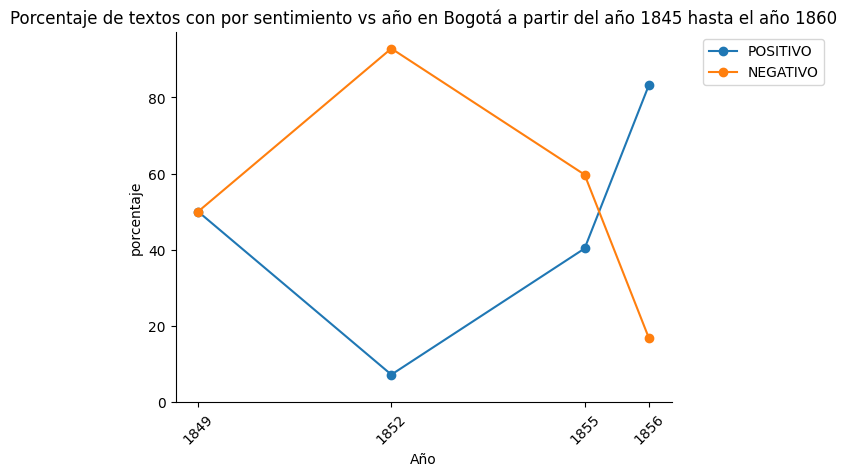

In [33]:
# Graficar solo para la ciudad de Bogotá y el periódico El Tiempo
graficar_porcentaje_sentimientos(data, max_year=1860, min_year=1845, ciudad='Bogotá', sentiments=['POSITIVO', 'NEGATIVO'])

100%|██████████| 16960/16960 [00:00<00:00, 194195.05it/s]


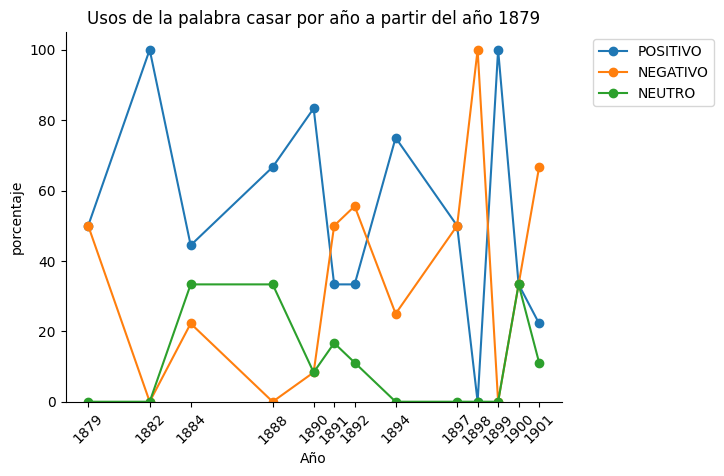

100%|██████████| 16960/16960 [00:00<00:00, 126951.77it/s]


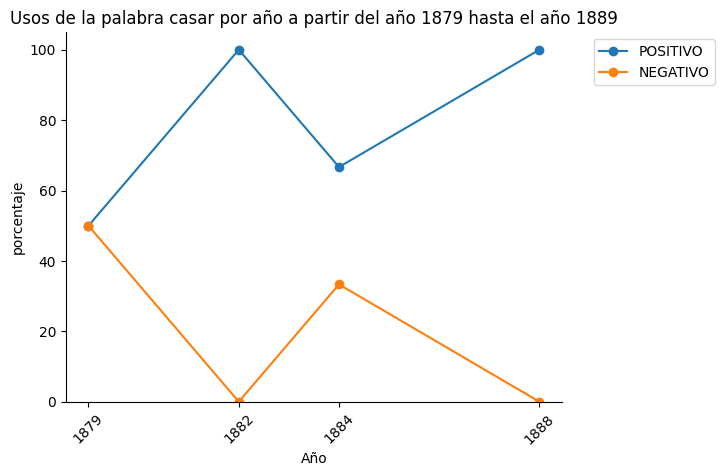

In [39]:
import pandas as pd
import spacy
from tqdm import tqdm

# Load the Spanish NLP model
nlp = spacy.load("es_core_news_sm")

def sentiment_by_word(
        word,
        min_year=None,
        max_year=None,
        sentiments=['POSITIVO', 'NEGATIVO', 'NEUTRO']
    ):
    df_copy = data.copy()

    # Process the word using Spacy to get its lemma
    doc = nlp(word)
    word_lemma = doc[0].lemma_

    # List to store filtered rows
    filtered_rows = []

    # Filter the DataFrame rows that contain the word lemma
    for i, lemmas in tqdm(enumerate(df_copy['Texto_Lematizado']), total=len(df_copy)):
        words = lemmas[2:-2].split("', '")
        if word_lemma in words:
            filtered_rows.append(df_copy.loc[i])

    # Create a DataFrame from the filtered rows
    if filtered_rows:
        df_filtered = pd.DataFrame(filtered_rows)
    else:
        df_filtered = pd.DataFrame(columns=df_copy.columns)

    # Plot the sentiment percentages
    graficar_porcentaje_sentimientos(
        df_filtered,
        titulo=f'Usos de la palabra {word_lemma} por año',
        min_year=min_year,
        max_year=max_year,
        sentiments=sentiments
    )

# Example calls to the function
sentiment_by_word("casar", min_year=1879)
sentiment_by_word("casar", sentiments=['POSITIVO', 'NEGATIVO'],min_year=1879, max_year=1889)


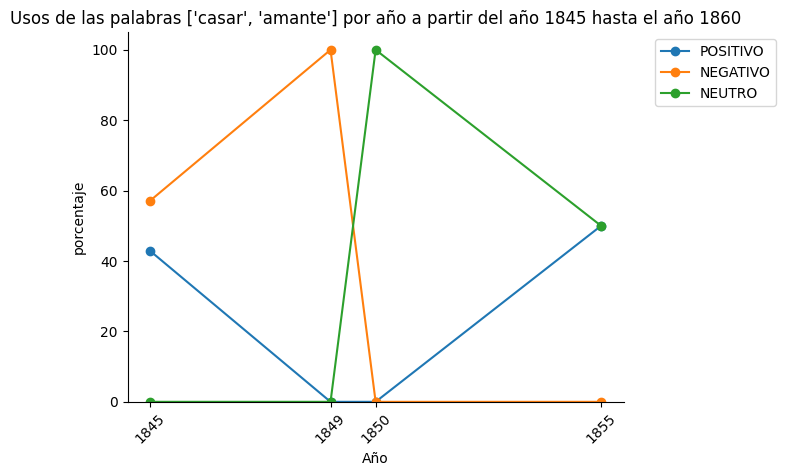

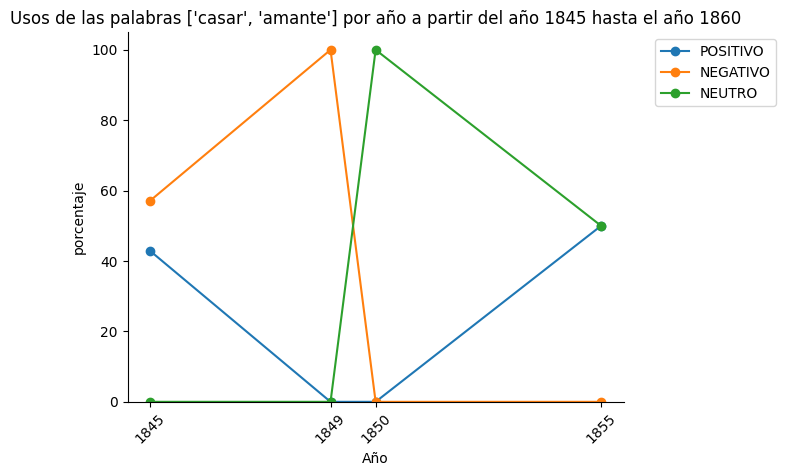

In [28]:
def sentiment_by_words(
        word_list,
        min_year=None,
        max_year=None,
        sentiments=['POSITIVO', 'NEGATIVO', 'NEUTRO']
    ):
    df_copy = data.copy()

    # Obtener los lemas de las palabras de la lista
    word_lemmas = [nlp(word)[0].lemma_ for word in word_list]

    # Filtrar el DataFrame para las filas que contienen cualquiera de los lemas
    def row_contains_lemmas(row, lemmas):
        return any(lemma in row for lemma in lemmas)

    df_filtered = df_copy[df_copy['Texto_Lematizado'].apply(lambda x: row_contains_lemmas(x, word_lemmas))]

    # Graficar los resultados
    graficar_porcentaje_sentimientos(
        df_filtered,
        titulo=f'Usos de las palabras {word_lemmas} por año',
        min_year=min_year,
        max_year=max_year,
        sentiments=sentiments
    )

# Llamadas de ejemplo a la función
sentiment_by_words(["casar", "amante"], max_year=1860, min_year=1845)
sentiment_by_words(["casar", "amante"], sentiments=['POSITIVO', 'NEGATIVO', 'NEUTRO'], max_year=1860, min_year=1845)

In [ ]:
def graficar_porcentaje_sentimientos_barplot(
        df,
        ciudad=None,
        periodico=None,
        min_year=None,
        max_year=None,
        titulo='Porcentaje de textos por sentimiento',
        sentiments=['POSITIVO', 'NEGATIVO', 'NEUTRO', 'IRONIA']
    ):
    # Filtrar el DataFrame según los parámetros recibidos
    df_filtrado = df.copy()
    if ciudad:
        df_filtrado = df_filtrado[df_filtrado['Ciudad'] == ciudad]
        titulo += f' en {ciudad}'
    if periodico:
        df_filtrado = df_filtrado[df_filtrado['Periódico'] == periodico]
        titulo += f' publicado por {periodico}'

    if min_year:
        df_filtrado = df_filtrado[df_filtrado['Año'] >= min_year]
        titulo += f' a partir del año {min_year}'
    if max_year:
        df_filtrado = df_filtrado[df_filtrado['Año'] <= max_year]
        titulo += f' hasta el año {max_year}'

    # Calcular los porcentajes de sentimientos
    sentiment_counts = df_filtrado['Sentimiento'].value_counts(normalize=True)[sentiments] * 100
    sentiment_counts = sentiment_counts.reindex(sentiments, fill_value=0)

    # Crear un barplot
    fig, ax = plt.subplots()
    sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue', 'gray'])
    plt.ylabel('Porcentaje (%)')
    plt.title(titulo)
    plt.xticks(rotation=45)
    plt.ylim(0, 100)  # Asegurarse de que el eje Y siempre vaya de 0 a 100%
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

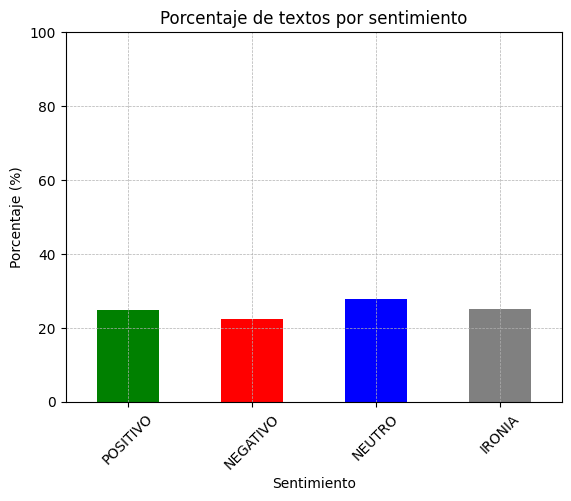

In [ ]:
graficar_porcentaje_sentimientos_barplot(df)

# Si es la palabra exacta

100%|██████████| 16960/16960 [00:00<00:00, 441174.37it/s]


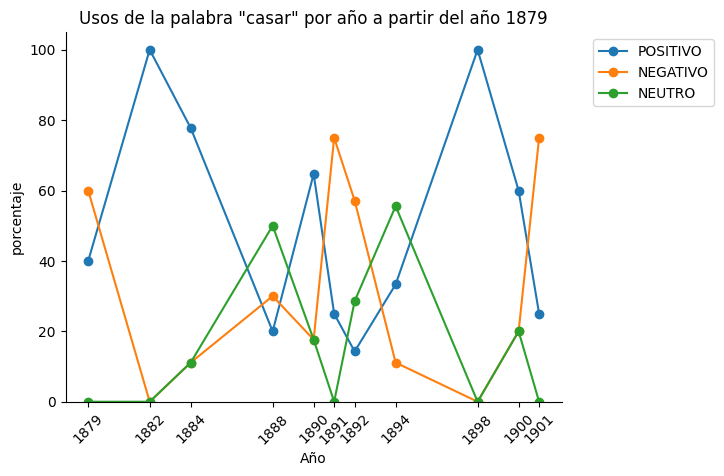

100%|██████████| 16960/16960 [00:00<00:00, 602786.15it/s]


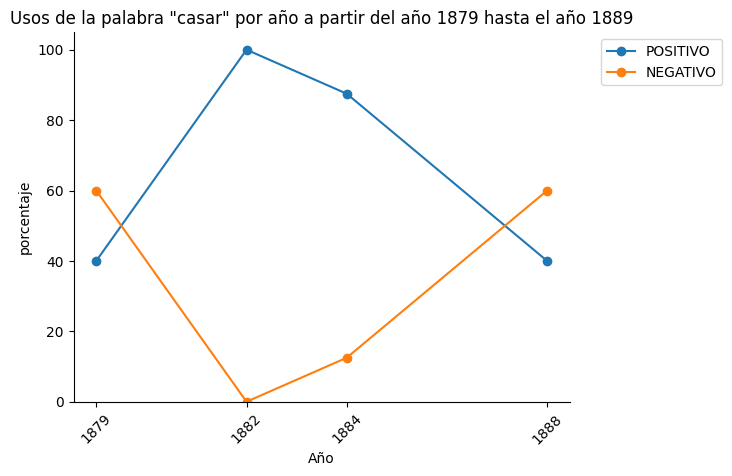

In [41]:
import pandas as pd
from tqdm import tqdm

def sentiment_by_exact_word(
        word,
        min_year=None,
        max_year=None,
        sentiments=['POSITIVO', 'NEGATIVO', 'NEUTRO']
    ):
    df_copy = data.copy()

    # List to store filtered rows
    filtered_rows = []

    # Filter the DataFrame rows that contain the exact word
    for i, text in tqdm(enumerate(df_copy['Texto']), total=len(df_copy)):
        if word in text:
            filtered_rows.append(df_copy.loc[i])

    # Create a DataFrame from the filtered rows
    if filtered_rows:
        df_filtered = pd.DataFrame(filtered_rows)
    else:
        df_filtered = pd.DataFrame(columns=df_copy.columns)

    # Plot the sentiment percentages
    graficar_porcentaje_sentimientos(
        df_filtered,
        titulo=f'Usos de la palabra "{word}" por año',
        min_year=min_year,
        max_year=max_year,
        sentiments=sentiments
    )

# Example calls to the function
sentiment_by_exact_word("casar", min_year=1879)
sentiment_by_exact_word("casar", sentiments=['POSITIVO', 'NEGATIVO'], min_year=1879, max_year=1889)


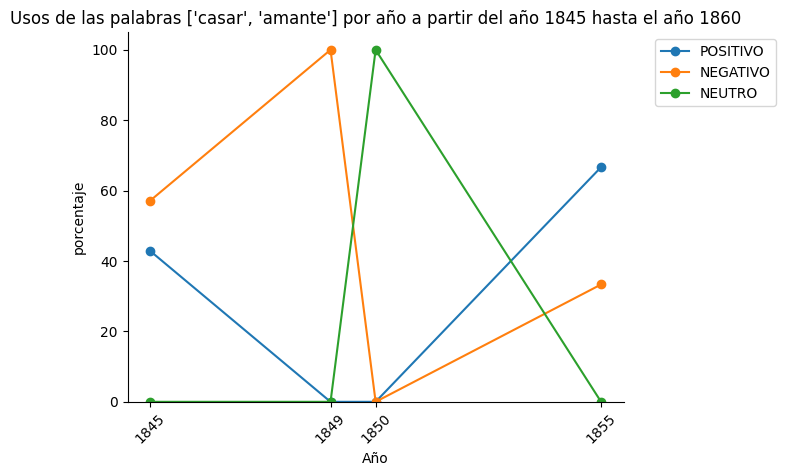

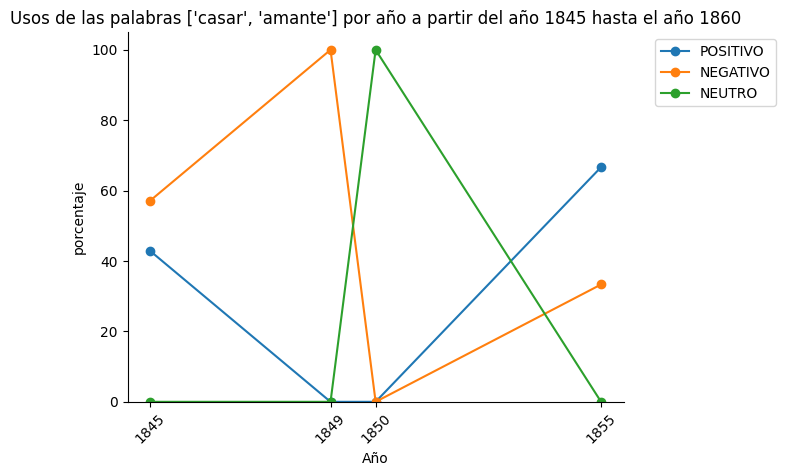

In [42]:
import pandas as pd
from tqdm import tqdm

def sentiment_by_exact_words(
        word_list,
        min_year=None,
        max_year=None,
        sentiments=['POSITIVO', 'NEGATIVO', 'NEUTRO']
    ):
    df_copy = data.copy()

    # Filtrar el DataFrame para las filas que contienen cualquiera de las palabras
    def row_contains_words(row, words):
        return any(word in row for word in words)

    df_filtered = df_copy[df_copy['Texto'].apply(lambda x: row_contains_words(x, word_list))]

    # Graficar los resultados
    graficar_porcentaje_sentimientos(
        df_filtered,
        titulo=f'Usos de las palabras {word_list} por año',
        min_year=min_year,
        max_year=max_year,
        sentiments=sentiments
    )

# Llamadas de ejemplo a la función
sentiment_by_exact_words(["casar", "amante"], max_year=1860, min_year=1845)
sentiment_by_exact_words(["casar", "amante"], sentiments=['POSITIVO', 'NEGATIVO', 'NEUTRO'], max_year=1860, min_year=1845)
